In [40]:
# Dependencies and Setup
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [41]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [42]:
# File to Load 
mouse_drug_data_to_load = "C:/Users/dbruen/Documents/Data Analytics/CU Bootcamp Homework/05 Matplotlib HW/Pymaceuticals_DanBruen/Pymaceutical_Data/mouse_drug_data.csv"
clinical_trial_data_to_load = "C:/Users/dbruen/Documents/Data Analytics/CU Bootcamp Homework/05 Matplotlib HW/Pymaceuticals_DanBruen/Pymaceutical_Data/clinical_trial_data.csv"


In [43]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
trial_df = pd.read_csv(clinical_trial_data_to_load)

In [44]:
# Combine the data into a single dataset
drug_data_df = pd.merge(trial_df, mouse_data, on="Mouse ID")

In [45]:
# Display the data table for preview
drug_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [46]:
# **Tumor Response to Treatment**

In [47]:
# Convert to DataFrame - this has already been done, essentially
mean_tumor_vol = drug_data_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()
mean_tumor_vol = pd.DataFrame(mean_tumor_vol).reset_index()

In [48]:
# Preview DataFrame
mean_tumor_vol.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [49]:
len(mean_tumor_vol)

100

In [50]:
# Unique counts of Drugs
mean_tumor_vol["Drug"].value_counts()

Placebo      10
Ramicane     10
Infubinol    10
Propriva     10
Capomulin    10
Ketapril     10
Naftisol     10
Ceftamin     10
Stelasyn     10
Zoniferol    10
Name: Drug, dtype: int64

In [51]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
## Import SEM Dependencies
from scipy.stats import sem
from random import random

In [52]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_vol = drug_data_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()
sem_tumor_vol

Drug       Timepoint
Capomulin  0            0.000000
           5            0.448593
           10           0.702684
           15           0.838617
           20           0.909731
                          ...   
Zoniferol  25           0.602513
           30           0.800043
           35           0.881426
           40           0.998515
           45           1.003576
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [53]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
reformed_mean_tumor_vol = mean_tumor_vol.pivot(index="Timepoint", 
                                                   columns="Drug",
                                                   values="Tumor Volume (mm3)")
reformed_mean_tumor_vol.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [54]:
# Generate the Plot (with Error Bars)
# Creating a scatter plot that shows how the tumor volume changes over time for each treatment

In [55]:
# list out all the individual drugs
reformed_mean_tumor_vol.axes[1].tolist()

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [56]:
# Set Vriables
## List out all the drugs into variable
drug_list = ['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

No handles with labels found to put in legend.


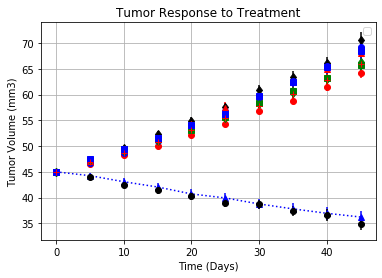

In [61]:
# Generate the Plot (with Error Bars)
# Creating a scatter plot that shows how the tumor volume changes over time for each treatment
drug_list = ['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

plt_style_dict = {'Capomulin':'b^:',
 'Ceftamin': 'ro',
 'Infubinol': 'gs',
 'Ketapril': 'kd',
 'Naftisol': 'bo',
 'Placebo': 'r^',
 'Propriva': 'gd',
 'Ramicane': 'ko',
 'Stelasyn': 'bs',
 'Zoniferol': 'r+'}

fig1, ax1 = plt.subplots()
for drug in drug_list:
    ax1.errorbar(reformed_mean_tumor_vol.index, reformed_mean_tumor_vol[drug], sem_tumor_vol[drug], fmt = plt_style_dict[drug])
ax1.legend()
plt.grid(True)
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')

#Save plot 
plt.savefig("TumorResponseToTreatment.png")
plt.show()

In [21]:
# Save the Figure

In [22]:
# ** Metastatic Response to Treatment **

In [23]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met = drug_data_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()
mean_met.head()

Drug       Timepoint
Capomulin  0            0.000000
           5            0.160000
           10           0.320000
           15           0.375000
           20           0.652174
Name: Metastatic Sites, dtype: float64

In [24]:
# Dataframe
mean_met = drug_data_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()
mean_met_df = pd.DataFrame(mean_met).reset_index()
mean_met_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [65]:
 # Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_met_sites = drug_data_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()
sem_met_sites.head()

Drug       Timepoint
Capomulin  0            0.000000
           5            0.074833
           10           0.125433
           15           0.132048
           20           0.161621
Name: Metastatic Sites, dtype: float64

In [26]:
# Convert to DataFrame
sem_met_sites_df = pd.DataFrame(sem_met_sites).reset_index()

In [27]:
# Preview DataFrame
sem_met_sites_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [68]:
reformed_met_sites = sem_met_sites_df.pivot(index="Timepoint", 
                                                   columns="Drug",
                                                   values="Metastatic Sites")
reformed_met_sites.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


KeyError: 'Capomulin'

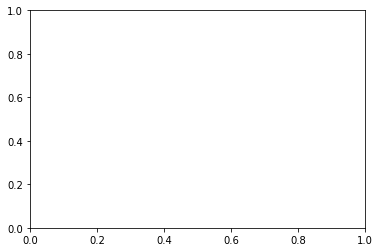

In [70]:
# Generate the Plot (with Error Bars)
drug_list = ['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

plt_style_dict = {'Capomulin':'b^:',
 'Ceftamin': 'ro',
 'Infubinol': 'gs',
 'Ketapril': 'kd',
 'Naftisol': 'bo',
 'Placebo': 'r^',
 'Propriva': 'gd',
 'Ramicane': 'ko',
 'Stelasyn': 'bs',
 'Zoniferol': 'r+'}

fig1, ax2 = plt.subplots()
for drug in drug_list:
    ax2.errorbar(mean_met_df.index, mean_met_df[drug], sem_met_sites_df[drug], fmt = plt_style_dict[drug])
ax2.legend()
plt.grid(True)
plt.title('Metastatic Site Spread During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Metastatic Sites')

#Save plot 
plt.savefig("MetSiteToTreatment.png")
plt.show()

In [28]:
# ** Survival Rates **
# Set Dependencies


In [32]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
drug_data_df = pd.merge(trial_df, mouse_data, on="Mouse ID")
mice_count = drug_data_df.groupby(["Drug", "Timepoint"])["Mouse ID"].count()
mice_count.head()

Drug       Timepoint
Capomulin  0            25
           5            25
           10           25
           15           24
           20           23
Name: Mouse ID, dtype: int64

In [34]:
# Convert to DataFrame
mice_count_df = pd.DataFrame(mice_count).reset_index()

# Preview DataFrame
mice_count_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [36]:
# Minor Data Munging to Re-Format the Data Frames
reformed_mince_count = mice_count_df.pivot(index="Timepoint", 
                                                   columns="Drug",
                                                   values="Mouse ID")
# Preview the Data Frame
reformed_mince_count.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [71]:
# Generate the Plot (Accounting for percentages)
# Mouse Survival Rate Percentages
for column in reformed_mince_count.columns:
    mouse_survival_rate = reformed_mince_count[column]/25 *100

In [76]:
mouse_survival_rate

Timepoint
0     100.0
5      96.0
10     88.0
15     84.0
20     68.0
25     64.0
30     60.0
35     56.0
40     56.0
45     56.0
Name: Zoniferol, dtype: float64

KeyError: 'Capomulin'

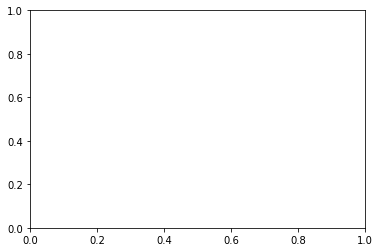

In [73]:
# Save the Figure
for column in reformed_mince_count.columns:
    mouse_survival_rate = reformed_mince_count[column]/25 *100

fig3, ax3 = plt.subplots()
for drug in drug_list:
    plt.plot(mouse_survival_rate.index, mouse_survival_rate[drug], plt_style_dict[drug])
plt.grid(True)
ax3.legend()
plt.title("Survival Throughout Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")

# Save the Figure
plt.savefig("SurvivalThroughTreatment.png")
# Show the Figure
plt.show()


In [37]:
# ** Summary Bar Graph **

In [39]:
# Display the data to confirm


In [ ]:
# Written description of three observable trends based on the data.